# Nuova sezione

In [ ]:
def sigmoid(x):
  """
  Applica la sigmoide a un layer di neuroni.

  Args:
      x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

  Returns:
      np.ndarray: Restituisce la matrice di input con la sigmoide applicata.
  """
  # Limita i valori di x per evitare overflow numerico durante il calcolo della funzione esponenziale
  x_clipped = np.clip(x, -500, 500)

  # Calcola la funzione sigmoide
  return 1 / (1 + np.exp(-x_clipped))

def der_sigmoid(x):
  """
  Calcola la derivata della funzione sigmoide.

  Args:
      x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

  Returns:
      np.ndarray: Restituisce l'output della derivata della funzione sigmoide.
  """
  # Calcola la sigmoide di x
  sigm = sigmoid(x)

  # Calcola la derivata di x
  return sigm * (1 - sigm)


def identity(x):
  """
    restituisce il valore di input.

    Args:
        x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

    Returns:
        np.ndarray: Restituisce lo stesso valore passato come input, senza alcuna trasformazione.
  """
  return x

def der_identity(x):
  """
    Derivata della funzione identità: restituisce sempre 1.

    Args:
        x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

    Returns:
        np.ndarray: matrice di 1.
  """
  return np.ones_like(x)

def tanh(x):
  """
    unzione di attivazione tanh, che restituisce valori compresi tra -1 e 1.

    Args:
        x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

    Returns:
        np.ndarrFay: Il risultato della funzione tanh applicato ad ogni elemento di x.
  """
  return np.tanh(x)

def der_tanh(x):
  """
    Derivata della funzione di attivazione tanh.

    Args:
        x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

    Returns:
        np.ndarray: La derivata della funzione tanh applicata ad ogni elemento di x.
  """
  return 1 - np.tanh(x) ** 2


def relu(x):
  """
    Funzione di attivazione ReLU, restituisce:
    - 0 per tutti i valori negativi o nulli di x
    - x per tutti i valori positivi di x.

    Args:
        x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

    Returns:
        np.ndarray: La funzione ReLU applicata ad ogni elemento di x.
  """
  return np.maximum(0, x)


def der_relu(x):
  """
    Derivata della funzione di attivazione ReLU, restituisce:
    - 0 per tutti i valori negativi o nulli di x.
    - 1 per tutti i valori positivi di x.

    Args:
        x (np.ndarray): L'input è una matrice (num_esempi x num_neurons_layer).

    Returns:
        np.ndarray: La derivata di ReLU applicata ad ogni elemento di x.
  """
  return np.where(x > 0, 1, 0)


def cross_entropy_with_softmax(output, labels):
  """
    Calcola la funzione di errore Cross-Entropy con Softmax.

    Args:
        output (np.ndarray): La matrice di output della rete neurale (num_esempi x 10), con la softmax applicata riga per riga
        labels (np.ndarray): Le etichette corrette per il dataset in rappresentazione one-hot (num_esempi x 10)

    Returns:
        float: la somma delle Cross-Entropy con Softmax applicate a tutti gli esempi.
  """
  epsilon = 1e-12  # Piccola costante per evitare valori log(0)
  clipped_output = np.clip(output, epsilon, 1 - epsilon)  # Evita log(0) applicando un minimo epsilon agli output
  return -np.sum(labels * np.log(clipped_output))  # Ritorna la Cross-Entropy


def cross_entropy_der_with_softmax(output, labels):
  """
    Calcola la derivata della funzione di errore Cross-Entropy con Softmax.

    Args:
        output (np.ndarray): La matrice di output della rete neurale (num_esempi x 10), con la softmax applicata riga per riga.
        labels (np.ndarray): Le etichette corrette per il dataset in rappresentazione one-hot (num_esempi x 10).

    Returns:
        np.ndarray: matrice (num_esempi x 10) che contiene le derivate della matrice output
  """
  return output - labels  # Derivate della Cross-Entropy con Softmax


def cross_entropy_binary(output, labels):
  """
    Calcola la funzione di errore Cross-Entropy binaria (1 solo neurone di output).

    Args:
        output (np.ndarray): Il vettore colonna di output della rete neurale (num_esempi), con la softmax applicata riga per riga.
        labels (np.ndarray): Il vettore delle etichette corrette per il dataset (1 o 0 per esempio) in rappresentazione one-hot (num_esempi).

    Returns:
        float: la somma delle Cross-Entropy binarie applicate a tutti gli esempi.
  """
  return (-1) * np.sum(labels * np.log(output) + (1 - labels) * np.log(1 - output))


def cross_entropy_binary_der(output, labels):
  """
    Calcola la derivata della funzione di errore Cross-Entropy binaria(1 solo neurone di output).

    Args:
        output (np.ndarray): Il vettore colonna di output della rete neurale (num_esempi), con la softmax applicata riga per riga.
        labels (np.ndarray): Il vettore delle etichette corrette per il dataset (1 o 0 per esempio) in rappresentazione one-hot (num_esempi).

    Returns:
        np.ndarray: Un array della stessa forma di 'output', contenente le derivate della funzione di errore.
  """
  return (output - labels) / (output * (1 - output))


def sum_of_squares(output, labels):
    """
    Calcola la funzione di errore della somma dei quadrati.

    Args:
        output (np.ndarray): Matrice di output (num_esempi x 10).
        labels (np.ndarray): Matrice delle etichette corrette (num_esempi x 10).

    Returns:
        float: Il valore dell'errore calcolato come la somma dei quadrati delle differenze tra
               le previsioni e le etichette reali per tutti gli esempi e tutte le classi.
    """
    # Calcola la somma dei quadrati delle differenze per ogni esempio su tutte le 10 classi.
    # La somma totale degli errori quadrati viene restituita come un valore scalare.
    return 1/2 * np.sum((output - labels) ** 2)


def sum_of_squares_der(output, labels):
  """
    Calcola la derivata della funzione di errore della somma dei quadrati.

    Args:
        output (np.ndarray): Matrice di output (num_esempi x 10).
        labels (np.ndarray): Matrice delle etichette corrette (num_esempi x 10).

    Returns:
        np.ndarray: matrice (num_esempi x 10), che rappresenta la differenza tra le previsioni e le etichette corrette.
  """
  # La derivata della somma dei quadrati per ogni esempio è la differenza tra l'output e le etichette reali
  return output - labels

In [ ]:
class NeuralNetwork:
  """
  Classe per la creazione e gestione di una rete neurale artificiale.

  Args:
      input_size (int): Numero di feature.
      learning_rate (float): Tasso di apprendimento per l'aggiornamento dei pesi.
      error_function_name (str, optional): Funzione di errore da utilizzare ('cross_entropy' o 'sum_of_squares'). Default: 'cross_entropy'.
      softmax (bool, optional): Indica se applicare la softmax per problemi di classificazione multiclasse. Default: True.
      patience (int, optional): Numero massimo di epoche senza miglioramenti prima dello stop del training. Default: 10.

  Attributes:
      layers (list): Contiene i livelli della rete neurale.
      input_size (int): Numero di feature.
      learning_rate (float): Tasso di apprendimento.
      error_function_name (str, optional): Nome della funzione di errore utilizzata.
      softmax (bool): Flag che indica se la softmax è attiva.
      rprop_active (bool): Flag per indicare se l'algoritmo Rprop è attivo.
      patience (int): Numero massimo di epoche senza miglioramenti da eseguire.
      error_function (callable): Funzione di errore scelta.
      error_function_derivative (callable): Derivata della funzione di errore scelta.
    """
  def __init__(self, input_size, learning_rate, error_function_name = 'cross_entropy', softmax = True, patience = 10):
    self.layers = []
    self.input_size = input_size
    self.learning_rate = learning_rate
    self.error_function_name = error_function_name
    self.softmax = softmax
    self.rprop_active = False
    self.patience = patience
    # Configurazione della funzione di errore e della sua derivata in base alla scelta dell'utente
    if error_function_name == 'cross_entropy':
        if softmax:
            # Se il flag della softmax è attivo, si usa la cross-entropy con softmax
            self.error_function = cross_entropy_with_softmax
            self.error_function_derivative = cross_entropy_der_with_softmax
        else:
            # Se il flag della softmax non è attivo, si usa la cross-entropy binaria per problemi a due classi
            self.error_function = cross_entropy_binary
            self.error_function_derivative = cross_entropy_binary_der
    elif error_function_name == 'sum_of_squares':
        self.error_function = sum_of_squares
        self.error_function_derivative = sum_of_squares_der
    else:
        # Solleva un'eccezione se la funzione di errore non è supportata
        raise ValueError(f"Funzione di errore '{error_function_name}' non valida. Le opzioni valide sono 'cross_entropy' o 'sum_of_squares'.")

  def set_rprop(self, flag, eta_minus = 0.5, eta_plus = 1.2, delta_min = 1e-6, delta_max = 50):
    """
    Attiva o disattiva l'algoritmo Rprop e inizializza i parametri per l'aggiornamento dei pesi.

    Args:
        flag (bool): Se True, abilita l'algoritmo Rprop. Se False, lo disabilita.
        eta_minus (float, optional): Fattore di riduzione per il passo di aggiornamento quando il gradiente cambia segno. Default: 0.5.
        eta_plus (float, optional): Fattore di incremento per il passo di aggiornamento quando il gradiente mantiene il segno. Default: 1.2.
        delta_min (float, optional): Valore minimo per il passo di aggiornamento dei pesi. Default: 1e-6.
        delta_max (float, optional): Valore massimo per il passo di aggiornamento dei pesi. Default: 50.
    """
    self.rprop_active = flag
    self.eta_minus = eta_minus
    self.eta_plus = eta_plus
    self.delta_min = delta_min
    self.delta_max = delta_max
    self.deltas_matrix_w = None
    self.deltas_weights_matrix_w = None
    self.derivatives_matrix_w = None
    self.deltas_matrix_b = None
    self.deltas_weights_matrix_b = None
    self.derivatives_matrix_b = None

  def softmax_function(self, output_data):
    """
    Calcola la funzione softmax su una matrice (num_esempi x 10).

    Args:
        output_data (np.ndarray): Matrice di input su cui applicare la funzione softmax riga per riga.

    Returns:
        np.ndarray: Matrice di input trasformata tramite softmax: i valori per riga
                    rappresentano probabilità che sommano a 1.
    """

    # Applica la funzione softmax lungo l'asse 1 (dimensione delle classi)
    return sc.softmax(output_data, axis=1)

  def forward_propagation(self, input_data):
    """
    Esegue la propagazione in avanti attraverso la rete neurale, calcolando l'output finale.

    Args:
        input_data (np.ndarray): Matrice di input di forma (num_esempi x num_feature),
                                dove ogni riga rappresenta un esempio.

    Returns:
        np.ndarray: Output finale della rete, una matrice (num_esempi x 10). Se `self.softmax` è True,
                    l'output è trasformato con la funzione softmax per ottenere probabilità.
    """

    # Inizializza l'output corrente con i dati di input
    curr_output = np.array(input_data)

    # Propaga i dati attraverso ogni layer della rete
    for layer in self.layers:
        curr_output = layer.forward_pass(curr_output)

    # Applica la softmax all'output finale (se abilitato nel costruttore)
    if self.softmax:
        curr_output = self.softmax_function(curr_output)

    # Restituisce l'output finale della rete
    return curr_output

  def add_layer(self, n_neurons, activation_function, derivative_activation):
    """
    Aggiunge un nuovo layer alla rete neurale.

    Args:
        n_neurons (int): Numero di neuroni nel nuovo layer.
        activation_function (function): Funzione di attivazione da applicare nei neuroni del layer.
        derivative_activation (function): Derivata della funzione di attivazione (necessaria per la backpropagation).
    """
    # Determina il numero di neuroni di input per il nuovo layer
    if not self.layers:
        layer_input_size = self.input_size  # Se è il primo layer, usa il numero di feature
    else:
        layer_input_size = self.layers[-1].n_neurons  # Altrimenti, usa il numero di neuroni dell'ultimo layer

    # Crea e aggiunge il nuovo layer alla rete neurale
    self.layers.append(Layer(layer_input_size, n_neurons, activation_function, derivative_activation))


  def backward_propagation(self, output_data, labels):
    """
    Esegue la propagazione all'indietro per aggiornare i pesi della rete neurale.

    Args:
        output_data (np.ndarray): L'output dell'ultima forward propagation (num_esempi x 10).
        labels (np.ndarray): Le etichette corrette per gli esempi in one-hot (num_esempi x 10).

    Returns:
        deltas (list): Una lista (dim: num_layer) di matrici di delta (dim: num_weights = num_input_neurons x num_neurons)
    """

    deltas = []

    # Calcola l'errore con la funzione di errore (stabilita dal costruttore)
    error = self.error_function_derivative(output_data, labels)

    # Calcola i delta del layer di output
    output_layer_deltas = error * self.layers[-1].derivative_activation(self.layers[-1].unactived_output)

    # Aggiungi i delta del layer di output alla lista dei delta (prima vuota)
    deltas.insert(0, output_layer_deltas)

    # Calcola i delta degli altri layer (partendo dal penultimo, arrivando al primo)
    for l in range(len(self.layers) - 2, -1, -1):
        # Calcola i delta del layer interno l-esimo
        curr_delta = deltas[0].dot(self.layers[l + 1].weights.T) * self.layers[l].derivative_activation(self.layers[l].unactived_output)
        deltas.insert(0, curr_delta)  # Aggiungi i delta del layer interno l-esimo alla lista

    return deltas  # Restituisci la lista dei delta


  def get_copy(self):
    """
    Crea una copia esatta della rete neurale corrente.

    Returns:
        new_net (NeuralNetwork): Una copia di se stessa
    """
    # Crea una nuova rete neurale con le stesse configurazioni della rete corrente
    new_net = NeuralNetwork(self.input_size, self.learning_rate, self.error_function_name, self.softmax, self.patience)

    # Aggiungi i layer della rete corrente alla nuova rete, mantenendo le stesse configurazioni
    for l in range(len(self.layers)):
        new_net.add_layer(self.layers[l].get_n_neurons(), self.layers[l].activation_function, self.layers[l].derivative_activation)

        # Copia i pesi e i bias del layer l-esimo nella nuova rete
        new_net.layers[-1].set_weights(self.layers[l].get_weights())
        new_net.layers[-1].set_bias(self.layers[l].get_bias())

    # Restituisce la nuova rete neurale con le stesse configurazioni e parametri
    return new_net


  def set_parameters_from_net(self, other_net):
    """
    Imposta i pesi e i bias della rete neurale corrente utilizzando quelli di un'altra rete.

    Args:
        other_net (NeuralNetwork): La rete neurale da cui copiare i pesi e i bias.
    """
    # Itera su tutti i layer della rete 'other_net'
    for l in range(len(other_net.layers)):
        # copia i pesi del layer l-esimo
        self.layers[l].set_weights(other_net.layers[l].get_weights())

        # copia i bias del layer l-esimo
        self.layers[l].set_bias(other_net.layers[l].get_bias())


  def default_update_rule(self, layer_index, layer_weight_derivatives, layer_bias_derivatives):
    """
    Aggiorna i pesi e i bias di un layer utilizzando la regola di aggiornamento standard.

    Args:
        layer_index (int): L'indice del layer di cui aggiornare pesi e bias.
        layer_weight_derivatives (np.ndarray): Le derivate dei pesi del layer specificato.
        layer_bias_derivatives (np.ndarray): Le derivate dei bias del layer specificato.
    """
    l = layer_index

    # Aggiorna i pesi sottraendo il prodotto tra il learning rate e le derivate dei pesi
    self.layers[l].weights -= self.learning_rate * layer_weight_derivatives

    # Aggiorna i bias del layer sottraendo il prodotto tra il learning rate e le derivate dei bias
    self.layers[l].bias -= self.learning_rate * layer_bias_derivatives


  def rprop_update_rule(self, layer_index, layer_weight_derivatives, layer_bias_derivatives):
      """
      Aggiorna i pesi e i bias di un layer utilizzando la regola di aggiornamento Rprop (Resilient Backpropagation).

      Args:
          layer_index (int): L'indice del layer di cui aggiornare pesi e bias.
          layer_weight_derivatives (np.ndarray): Le derivate correnti dei pesi del layer specificato.
          layer_bias_derivatives (np.ndarray): Le derivate correnti dei bias del layer specificato.
      """
      l = layer_index

      # Se la matrice Δ del layer corrente è None (Cioè ci troviamo alla prima epoca di update) inizializziamo adeguatamente le matrici dei valori di update
      if self.deltas_matrix_w[l] is None:
          # derivatives_matrix_w/b contiene la derivata parziale rispetto ai pesi/bias al tempo t-1, la assegnamo a 0 forzando il prodotto tra le derivate ad essere 0
          # in questo modo garantiamo il primo update dei pesi/bias sia regolare
          self.derivatives_matrix_w[l] = np.full(self.layers[l].weights.shape, 0)
          self.derivatives_matrix_b[l] = np.full(self.layers[l].bias.shape, 0)
          # Come suggerito nel paper, inizializziamo i delta al valore Δ₀ = 0.1
          self.deltas_matrix_w[l] = np.full(self.layers[l].weights.shape, 0.1)
          self.deltas_matrix_b[l] = np.full(self.layers[l].bias.shape, 0.1)

          # Operazioni facoltative (saranno sovrascritte in seguito), ma forzano il dtype dell'ndarray a float
          # (in mancanza di queste operazioni, Python assegnerà come dtype object, causando problemi con le funzioni matematiche di cui facciamo uso per aggiornare i pesi)
          self.deltas_weights_matrix_w[l] = np.full(self.layers[l].weights.shape, 0)
          self.deltas_weights_matrix_b[l] = np.full(self.layers[l].bias.shape, 0)


      # Calcoliamo le matrici dei prodotti tra le derivate al tempo t-1 ed al tempo t
      weight_grad_product = self.derivatives_matrix_w[l] * layer_weight_derivatives
      bias_grad_product = self.derivatives_matrix_b[l] * layer_bias_derivatives

      # Aggiorniamo posizionalmente le matrici Δ, in base al segno del prodotto tra le derivate, come da paper
      self.deltas_matrix_w[l] = np.where(weight_grad_product > 0, # in caso di segno positivo
                                        np.minimum(self.deltas_matrix_w[l] * self.eta_plus, self.delta_max), # moltiplichiamo Δᵢⱼ per η⁺ (o utilizziamo Δmax)
                                        np.where(weight_grad_product < 0, # in caso di segno negativo
                                                  np.maximum(self.deltas_matrix_w[l] * self.eta_minus, self.delta_min),  # moltiplichiamo Δᵢⱼ per η⁻ (o utilizziamo Δmin)
                                                  self.deltas_matrix_w[l]))  # in caso di segno nullo, update regolare

      # Aggiorniamo posizionalmente le matrici Δ, in base al segno del prodotto tra le derivate, come da paper
      self.deltas_matrix_b[l] = np.where(bias_grad_product > 0, # in caso di segno positivo
                                        np.minimum(self.deltas_matrix_b[l] * self.eta_plus, self.delta_max),  # moltiplichiamo Δᵢⱼ per η⁺, aumentiamo il passo di update (o utilizziamo Δmax)
                                        np.where(bias_grad_product < 0, # in caso di segno negativo
                                                  np.maximum(self.deltas_matrix_b[l] * self.eta_minus, self.delta_min),  # moltiplichiamo Δᵢⱼ per η⁻, diminuiamo il passo di update (o utilizziamo Δmin)
                                                  self.deltas_matrix_b[l]))  # in caso di segno nullo, update regolare

      # Aggiorniamo posizionalmente le matrici Δw, in base al segno del prodotto tra le derivate, come da paper
      self.deltas_weights_matrix_w[l] = np.where(weight_grad_product < 0, # in caso di segno negativo
                                                  self.deltas_weights_matrix_w[l], # lasciamo invariato Δwᵢⱼ
                                                  -np.sign(layer_weight_derivatives) * self.deltas_matrix_w[l]) # altrimenti, aggiorniamo Δwᵢⱼ in base al segno della derivata corrente
      self.deltas_weights_matrix_b[l] = np.where(bias_grad_product < 0, # in caso di segno negativo
                                                  self.deltas_weights_matrix_b[l], # lasciamo invariato Δwᵢⱼ
                                                  -np.sign(layer_bias_derivatives) * self.deltas_matrix_b[l]) # altrimenti, aggiorniamo Δwᵢⱼ in base al segno della derivata corrente

      # Aggiorniamo posizionalmente i pesi ed i bias in base alla matrice Δw
      self.layers[l].weights = np.where(weight_grad_product < 0, # in caso di segno negativo
                                        self.layers[l].weights - self.deltas_weights_matrix_w[l], # torniamo indietro di Δwᵢⱼ
                                        self.layers[l].weights + self.deltas_weights_matrix_w[l]) # altrimenti, avanziamo di Δwᵢⱼ
      self.layers[l].bias = np.where(bias_grad_product < 0, # in caso di segno negativo
                                      self.layers[l].bias - self.deltas_weights_matrix_b[l], # torniamo indietro di Δwᵢⱼ
                                      self.layers[l].bias + self.deltas_weights_matrix_b[l]) # altrimenti, avanziamo di Δwᵢⱼ

      # Aggiorniamo le matrici delle derivate al tempo t (alla prossima iterazione queste matrici conterranno correttamente le derivate al tempo t-1)
      self.derivatives_matrix_w[l] = np.where(weight_grad_product < 0, # se il prodotto tra le derivate ha segno negativo
                                              0, # assegniamo 0, in modo da evitare il double punishment
                                              layer_weight_derivatives) # altrimenti assegniamo la derivata corrente
      self.derivatives_matrix_b[l] = np.where(bias_grad_product < 0, # se il prodotto tra le derivate ha segno negativo
                                              0, # assegniamo 0, in modo da evitare il double punishment
                                              layer_bias_derivatives) # altrimenti assegniamo la derivata corrente

  def train_epoch(self, dataset_train, labels_train, batch_size):
    """
    Esegue il training della rete su una epoca

    Args:
        dataset_train (np.ndarray): Il dataset di training (num_esempi x 10).
        labels_train (np.ndarray): Le etichette del dataset di training (num_esempi x 10).
        batch_size (int): La dimensione dei minibatch o del batch per il training.
    """
    # Se operiamo in minibatch, permutiamo il dataset
    if batch_size < len(dataset_train):
      # Creiamo un array di indici per lo shuffle
      indices = np.arange(len(dataset_train))
      np.random.shuffle(indices)
      dataset_train = dataset_train[indices]  # Funziona con array NumPy
      labels_train = labels_train[indices]

    else:
        # Altrimenti, operiamo in batch
        batch_size = len(dataset_train)

    # Loop su tutti i minibatch (o una singola iterazione se in batch)
    for b in range(0, len(dataset_train), batch_size):
        # Estrai i dati e le etichette per il minibatch corrente
        batch_data = dataset_train[b:b + batch_size]
        batch_labels = labels_train[b:b + batch_size]

        # Propagazione in avanti sul minibatch corrente con final_output di dim: (batch_size x 10)
        final_output = self.forward_propagation(batch_data)

        # Propagazione all'indietro per calcolare i delta
        deltas = self.backward_propagation(final_output, batch_labels)

        # Aggiorniamo i pesi e i bias per ogni layer
        for l in range(len(self.layers)):
            if (l == 0):
                # Se siamo nel primo layer, l'input coincide col minibatch corrente
                output_j = batch_data
            else:
                # Altrimenti, l'input è l'output del layer precedente
                output_j = self.layers[l-1].output  # Output del layer precedente (z_j nei calcoli)

            # Calcolo delle derivate dei pesi e dei bias del layer l-esimo
            layer_weight_derivatives = output_j.T.dot(deltas[l])  # Derivata rispetto ai pesi
            layer_bias_derivatives = np.sum(deltas[l], axis=0, keepdims=True)  # Derivata rispetto ai bias

            # Se la Rprop non è attiva, aggiorniamo i pesi con la regola standard
            if (self.rprop_active == False):
                self.default_update_rule(l, layer_weight_derivatives, layer_bias_derivatives)
            # Se la Rprop è attiva, aggiorniamo i pesi con l'algoritmo della Rprop
            else:
                self.rprop_update_rule(l, layer_weight_derivatives, layer_bias_derivatives)

  def train_network(self, dataset_train, labels_train, dataset_val, labels_val, epochs, batch_size):
    """
    Esegue il training della rete su tutte le epoche.

    Args:
        dataset_train (np.ndarray): Il dataset di addestramento.
        labels_train (np.ndarray): Le etichette del dataset di addestramento.
        dataset_val (np.ndarray): Il dataset di validazione.
        labels_val (np.ndarray): Le etichette del dataset di validazione.
        epochs (int): Numero di epoche.
        batch_size (int): La dimensione dei minibatch per l'allenamento.

    Returns:
        tuple: Il modello allenato, il miglior modello (con minore errore di validazione),
              lista degli errori di training e la lista degli errori di validazione.
    """

    # Verifica se la softmax è usata con un solo neurone di output
    if (self.error_function == 'cross_entropy' and self.layers[-1].n_neurons == 1 and self.softmax):
        raise ValueError("Utilizzare la softmax in presenza di un solo neurone di output è errato")

    # Verifica se la softmax è omessa e c'è più di un neurone di output
    if (self.error_function == 'cross_entropy' and self.layers[-1].n_neurons != 1 and not self.softmax):
        raise ValueError("Non utilizzare la softmax in presenza di multipli neuroni di output è errato")

    # Verifica se si sta utilizzando la Rprop con minibatch o online, il che non è consentito
    if (self.rprop_active and batch_size < len(dataset_train)):
        raise ValueError("Non utilizzare la RPROP in minibatch o online")

    # Inizializza le matrici usate dalla Rpop, se attivata
    if (self.rprop_active == True):
        self.deltas_matrix_w = np.full(len(self.layers), None)
        self.deltas_weights_matrix_w = np.full(len(self.layers), None)
        self.derivatives_matrix_w = np.full(len(self.layers), None)
        self.deltas_matrix_b = np.full(len(self.layers), None)
        self.deltas_weights_matrix_b = np.full(len(self.layers), None)
        self.derivatives_matrix_b = np.full(len(self.layers), None)

    # Copia iniziale del modello
    best_net = self.get_copy()

    # Inizializzazione della lista degli errori di training
    errors_training_list = []

    # Calcolo dell'errore di training sulla prima rete (non allenata)
    first_train_output = self.forward_propagation(dataset_train)
    first_train_error = self.error_function(first_train_output, labels_train)
    errors_training_list.append(first_train_error)

    # Inizializzazione della lista degli errori di validation
    errors_validation_list = []

    # Calcolo dell'errore di validation sulla prima rete (non allenata)
    first_val_output = self.forward_propagation(dataset_val)
    first_val_error = self.error_function(first_val_output, labels_val)
    errors_validation_list.append(first_val_error)

    # Inizializzazione dell'errore di validazione minimo
    min_val_error = first_val_error
    wait = 0  # Conta le epoche senza miglioramenti

    # Stampa gli errori per la prima epoca
    print(f"Epoch {0}/{epochs}, Errore su training set: {errors_training_list[0]}, Errore su validation set: {errors_validation_list[0]}")

    # Loop per ogni epoca
    for epoch in range(epochs):
        # Allena il modello per l'epoca corrente
        self.train_epoch(dataset_train, labels_train, batch_size)

        # Calcola l'errore sul dataset di training per l'epoca corrente
        train_output = self.forward_propagation(dataset_train)
        train_error = self.error_function(train_output, labels_train)
        errors_training_list.append(train_error)

        # Calcola l'errore sul dataset di validation per l'epoca corrente
        val_output = self.forward_propagation(dataset_val)
        val_error = self.error_function(val_output, labels_val)
        errors_validation_list.append(val_error)

        # Se l'errore di validazione migliora, aggiorna il modello migliore
        if (val_error < min_val_error):
            best_net = self.get_copy()
            min_val_error = val_error
            wait = 0  # Reset del contatore di epoche senza miglioramenti
        else:
            wait += 1  # Altrimenti, incrementa il contatore se l'errore non migliora

        # Stampa gli errori per l'epoca corrente
        print(f"Epoch {epoch+1}/{epochs}, Errore su training set: {errors_training_list[epoch+1]}, Errore su validation set: {errors_validation_list[epoch+1]}")

        # Early stopping se non ci sono miglioramenti dopo 'patience' epoche
        if self.patience < wait:
            print(f"Early stopping all'epoca {epoch+1}")
            break

    return self, best_net, errors_training_list, errors_validation_list



In [ ]:
class Layer:
    """
    Classe per la creazione e gestione di layer di una rete neurale artificiale.

    Args:
        input_size (int): Numero di nodi del layer precedente.
        n_neurons (int): Numero di nodi desiderati.
        activation_function (callable): Funzione di attivazione scelta.
        derivative_activation (callable): Derivata della funzione di attivazione scelta.

    Attributes:
        input_size (int): Numero di nodi del layer precedente.
        n_neurons (int): Numero di nodi.
        activation_function (callable): Funzione di attivazione.
        derivative_activation (callable): Derivata della funzione di attivazione.
        weights (np.ndarray): Pesi del layer, matrice di dimensione (input_size x n_neurons).
        bias (np.ndarray): Bias del layer, vettore di dimensione (1 x n_neurons).
        unactived_output (np.ndarray): Output inattivato del layer corrente in forma matriciale.
        output (np.ndarray): Output finale del layer corrente in forma matriciale.
    """

    def __init__(self, input_size, n_neurons, activation_function, derivative_activation):
      self.input_size = input_size
      self.n_neurons = n_neurons
      self.activation_function = activation_function
      self.derivative_activation = derivative_activation
      # Genera una matrice casuale dei pesi
      self.weights = np.random.randn(input_size, n_neurons)
      # Genero un vettore di bias di zeri
      self.bias = np.zeros((1, n_neurons))

    def forward_pass(self, input):
      """
      Calcola l'output del layer corrente, immagine dell'input in ingresso.

      Args:
          input (np.ndarray): Dati in ingresso in forma matriciale, di dimensione (n x input_size).

      Returns:
          output (np.ndarray): Immagine dell'input in forma matriciale, di dimensione (n x n_neurons).
      """

      # L'output inattivato 'a' è ottenuto come il prodotto riga per colonna tra matrice input e matrice dei pesi, a cui sommiamo il bias uniformemente
      a = np.dot(input, self.weights) + self.bias # Il bias è sommato ad ogni riga mediante broadcasting automatico
      self.unactived_output = a # L'output inattivato servirà come input per la derivata della funzione di attivazione nel calcolo dei delta interni
      self.output = self.activation_function(a) # L'output è l'immagine dell'output inattivato mediante la funzione di attivazione
      return self.output

    def get_weights(self):
      """
      Restituisce una copia della matrice dei pesi del layer.

      Returns:
          (np.ndarray): Copia della matrice dei pesi.
      """

      return self.weights.copy()

    def set_weights(self, new_weights):
      """
      Setter per la matrice dei pesi utilizzando una copia della matrice in input.

      Args:
          new_weights (np.ndarray): Matrice dei pesi in input da settare.

      Raises:
          ValueError: se la forma della matrice in input non è (input_size x n_neurons)
      """

      if new_weights.shape != (self.input_size, self.n_neurons):
          raise ValueError("La forma del vettore di pesi deve essere (input_size, n_neurons)")
      self.weights = new_weights.copy() # Per evitare di modificare erroneamente la matrice dei pesi in input, ne facciamo una copia

    def get_bias(self):
      """
      Restituisce una copia del vettore dei bias del layer.

      Returns:
          (np.ndarray): Copia del vettore dei bias.
      """

      return self.bias.copy()

    def set_bias(self, new_bias):
      """
      Setter per il vettore dei bias utilizzando una copia del vettore in input.

      Args:
          new_bias (np.ndarray): Vettore dei bias in input da settare.

      Raises:
          ValueError: se la forma del vettore in input non è (1 x n_neurons)
      """

      if new_bias.shape != (1, self.n_neurons):
          raise ValueError("La forma del vettore di bias deve essere (1, n_neurons)")
      self.bias = new_bias.copy() # Per evitare di modificare erroneamente il vettore dei bias in input, ne facciamo una copia

    def get_input_size(self):
      """
      Getter per l'attributo input_size.

      Returns:
          input_size (int).
      """
      return self.input_size

    def get_n_neurons(self):
      """
      Getter per l'attributo n_neurons.

      Returns:
          n_neurons (int).
      """
      return self.n_neurons

In [ ]:
def k_fold_cross_validation(X, y, k, epochs, batch_size, input_size, hidden_size, output_size, learning_rate, eta_minus=0.5, eta_plus=1.2, delta_min=1e-6, delta_max=50):
  """
  Esegue il k-fold cross-validation per allenare e testare un modello di rete neurale.

  Args:
      X (np.ndarray): Dati di input.
      y (np.ndarray): Etichette del dataset.
      k (int): Numero di fold nel k-fold cross-validation.
      epochs (int): Numero di epoche per l'allenamento.
      batch_size (int): Dimensione dei minibatch per l'allenamento.
      input_size (int): Numero di caratteristiche (dimensione input).
      hidden_size (int): Numero di neuroni nel layer nascosto.
      output_size (int): Numero di neuroni nell'output (dimensione output).
      learning_rate (float): Tasso di apprendimento.
      eta_minus (float): Parametro di Rprop per l'aggiornamento dei pesi (default: 0.5).
      eta_plus (float): Parametro di Rprop per l'aggiornamento dei pesi (default: 1.2).
      delta_min (float): Minimo valore per il delta di Rprop (default: 1e-6).
      delta_max (float): Massimo valore per il delta di Rprop (default: 50).

  Returns:
      tuple: Una tupla contenente gli errori e le accuratezze di ciascun fold.
  """

  if (k <= 2):
    raise ValueError("Il numero di fold non può essere inferiore a 3")

  # Liste per memorizzare gli errori e le accuratezze di ciascun fold
  errors = []
  accuracies = []

  # Creazione dei fold utilizzando StratifiedKFold per mantenere la distribuzione delle classi
  skf = sk.StratifiedKFold(n_splits=k, shuffle=True, random_state=53)

  # skf.split è una lista di coppie di array, dove:
  # il primo elemento è il training set dell'i-esima iterazione;
  # il secondo elemento è il test set della stessa iterazione (Sono complementari)
  splits = list(skf.split(X, y))

  # Ciclo attraverso i fold
  for i in range(k):
      # Il fold corrente è usato per testing
      test_fold = i
      # Il prossimo fold è usato per validation
      val_fold = (i + 1) % k

      # Qui accediamo al secondo elemento (cioè il test set) dell'i-esima iterazione
      test_index = splits[test_fold][1]
      # Qui accediamo al secondo elemento (cioè il test set) dell'i+1-esima iterazione
      val_index = splits[val_fold][1]

      # Visualizza l'assegnazione dei fold
      # Segna i fold per il training
      fold_visual = ["T"] * k
      # Segna il fold di test
      fold_visual[test_fold] = "E"
      # Segna il fold di validation
      fold_visual[val_fold] = "V"
      print(f"Fold {i + 1}: " + " | ".join(fold_visual))
      print("-" * 50)

      # Prendiamo gli indici del training set come complemento dell'unione dei due set creati
      train_index = np.setdiff1d(np.arange(len(X)), np.concatenate((test_index, val_index)))

      # Estrazione dei dati dai rispettivi set secondo gli indici scelti
      X_train = X.iloc[train_index]
      X_validation = X.iloc[val_index]
      X_test = X.iloc[test_index]
      # Estrazione delle etichette dei dati dai rispettivi set secondo gli indici scelti
      y_train = y.iloc[train_index]
      y_validation = y.iloc[val_index]
      y_test = y.iloc[test_index]

      # One-hot encoding delle etichette
      y_train_onehot = one_hot_encode(y_train)
      y_validation_onehot = one_hot_encode(y_validation)
      y_test_onehot = one_hot_encode(y_test)

      # Converti i dati in array numpy
      X_train = X_train.to_numpy()
      X_validation = X_validation.to_numpy()
      X_test = X_test.to_numpy()

      # Creazione della rete neurale
      nn = NeuralNetwork(input_size, learning_rate, 'cross_entropy', True, patience=30)
      # Aggiungi il layer nascosto
      nn.add_layer(hidden_size, sigmoid, der_sigmoid)
      # Aggiungi il layer di output
      nn.add_layer(output_size, identity, der_identity)

      # Configura Rprop
      nn.set_rprop(True, eta_minus, eta_plus, delta_min, delta_max)

      # Training del modello
      nn, best_net, epochs_errors_t, epochs_errors_v = nn.train_network(X_train, y_train_onehot, X_validation, y_validation_onehot, epochs, batch_size)

      # Visualizzazione degli errori durante le epoche
      plot_epochs_errors(epochs_errors_t, epochs_errors_v, i, f"η-={eta_minus}, η+={eta_plus}, h={hidden_size}")

      # Ripristina i parametri del miglior modello
      nn.set_parameters_from_net(best_net)

      # Valutazione sul test set
      final_output_test = nn.forward_propagation(X_test)
      error = np.mean(nn.error_function(final_output_test, y_test_onehot))
      errors.append(error)

      # Calcola l'accuratezza
      predictions = np.argmax(final_output_test, axis=1)
      classes = np.argmax(y_test_onehot, axis=1)
      accuracy = np.mean(predictions == classes)
      accuracies.append(accuracy)

      # Stampa l'accuratezza e l'errore per il fold corrente
      print(f"Accuratezza su test set: {accuracy}")
      print(f"Errore nell'iterazione {i+1}: {error}")
      print("-" * 50)

  # Restituisci gli errori e le accuratezze
  return errors, accuracies

In [ ]:
def grid_search(X, y, k, epochs, batch_size, input_size, output_size, learning_rate, hyperparameters, plot_data = True, export_csv = True):

  """
    Esegue una ricerca a griglia sugli iperparametri per trovare la combinazione ottimale di iperparametri.

    Args:
        X (np.ndarray): Dati di input.
        y (np.ndarray): Etichette del dataset.
        k (int): Numero di fold nel k-fold cross-validation.
        epochs (int): Numero di epoche per l'allenamento.
        batch_size (int): Dimensione dei minibatch per l'allenamento.
        input_size (int): Numero di caratteristiche (dimensione input).
        output_size (int): Numero di neuroni nell'output (dimensione output).
        learning_rate (float): Tasso di apprendimento.
        hyperparameters (dict): Dizionario contenente gli iperparametri da testare.
        plot_data (bool): Se True, plotta i grafici per errori e accuratezze.
        export_csv (bool): Se True, esporta i risultati in un file CSV.

    Returns:
        tuple: Una tupla contenente gli errori, le accuratezze e i parametri testati.
    """

  # Estrai gli iperparametri dal dizionario
  h_eta_minusses = hyperparameters["h_eta_minusses"]
  h_eta_plusses = hyperparameters["h_eta_plusses"]
  h_neurons = hyperparameters["h_neurons"]

  # Inizializza il miglior errore con un valore molto alto
  best_error = float('inf')
  # Memorizzerà i migliori iperparametri
  best_params = None

  all_errors = []
  all_accuracies = []
  param_labels = []

  # Nome del file CSV in cui verranno esportati i risultati
  csv_filename = "Risultati_test_grid_search.csv"

  # Ricrea il file CSV ad ogni iterazione se non esiste
  with open(csv_filename, mode='w', newline='') as file:
      writer = csv.writer(file)
      writer.writerow(["Eta minus", "Eta plus", "Numero neuroni",
                        "Errore medio", "Std errore",
                        "Accuracy media", "Std accuracy", "Tempo esecuzione"])

  # Ciclo principale che esplora tutte le combinazioni di iperparametri
  for em in h_eta_minusses:
      for ep in h_eta_plusses:
          for n in h_neurons:
              # Stampa i parametri che si stanno testando
              print(f"\nTesting con eta_minus={em}, eta_plus={ep}, hidden_neurons={n}...")

              # Memorizza l'orario di inizio per calcolare il tempo di esecuzione
              start_k_fold_time = time.time()

              # Esegui il k-fold cross-validation con i parametri correnti
              epoch_errors, epoch_accuracies = k_fold_cross_validation(
                  X, y, k, epochs, batch_size, input_size, n, output_size, learning_rate,
                  eta_minus=em, eta_plus=ep
              )

              # Calcola il tempo di esecuzione per il k-fold cross-validation
              end_k_fold_time = time.time()
              elapsed_k_fold_time = round(end_k_fold_time - start_k_fold_time, 4)

              # Stampa il tempo impiegato
              print(f"Elapsed time: {elapsed_k_fold_time:.2f} seconds")

              # calcola la media e la deviazione standard delle accuracy
              mean_error = round(np.mean(epoch_errors), 4)
              std_error = round(np.std(epoch_errors), 4)

              # Calcola la media e la deviazione standard degli errori
              mean_accuracy = round(np.mean(epoch_accuracies), 4)
              std_accuracy = round(np.std(epoch_accuracies), 4)

              # Stampa i risultati per la combinazione corrente di iperparametri
              print(f"Errore medio: {mean_error:.4f}, Accuracy media: {mean_accuracy:.4f}")

              # Aggiungi gli errori, le accuratezze e i parametri testati alle rispettive liste
              all_errors.append(epoch_errors)
              all_accuracies.append(epoch_accuracies)
              param_labels.append({
                  "eta_minus": em,
                  "eta_plus": ep,
                  "hidden_neurons": n
              })

              # Se plot_data è True, disegna i grafici per errori e accuratezze
              if (plot_data):
                plot_fold_errors(epoch_errors, param_labels)
                plot_fold_accuracies(epoch_accuracies, param_labels)

              # Se export_csv è True, esporta i risultati nel file CSV
              if (export_csv):
                with open(csv_filename, mode='a', newline='') as file:
                    writer = csv.writer(file)
                    writer.writerow([em, ep, n,
                                    mean_error, std_error,
                                    mean_accuracy, std_accuracy, elapsed_k_fold_time])


  return all_errors, all_accuracies, param_labels

In [ ]:
def random_search(X, y, k, epochs, batch_size, input_size, output_size, learning_rate, hyperparameters, n_iter=5, plot_data = True, export_csv = True):
    """
    Esegue una ricerca random sui range di iperparametri per trovare la combinazione ottimale.

    Args:
        X (array-like): Dati di input.
        y (array-like): Etichette target.
        k (int): Numero di fold per la cross-validation.
        epochs (int): Numero di epoche di addestramento.
        batch_size (int): Dimensione del batch per l'addestramento.
        input_size (int): Numero di feature in input.
        output_size (int): Numero di classi in output.
        learning_rate (float): Tasso di apprendimento.
        hyperparameters (dict): Dizionario contenente i range degli iperparametri da ottimizzare.
        n_iter (int, opzionale): Numero di combinazioni casuali da testare. Default = 5.
        plot_data (bool, opzionale): Se True, genera i grafici degli errori e delle accuratezze. Default = True.
        export_csv (bool, opzionale): Se True, esporta i risultati in un file CSV. Default = True.

    Returns:
        tuple: Contiene tre elementi:
            - all_errors (list): Lista contenente gli errori medi per ogni combinazione testata.
            - all_accuracies (list): Lista contenente le accuratezze medie per ogni combinazione testata.
            - param_labels (list): Lista dei parametri testati con i rispettivi valori.
    """
    h_eta_minusses = hyperparameters["h_eta_minusses"]
    h_eta_plusses = hyperparameters["h_eta_plusses"]
    neuron_range = hyperparameters["h_neurons"]

    # Inizializza il miglior errore con un valore molto alto
    best_error = float('inf')
    # Memorizzerà i migliori iperparametri
    best_params = None

    all_errors = []
    all_accuracies = []
    param_labels = []

    # Nome del file CSV
    csv_filename = "Risultati_test_random_search.csv"

    # Ricrea il file CSV ad ogni iterazione se non esiste
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Eta minus", "Eta plus", "Numero neuroni",
                          "Errore medio", "Std errore",
                          "Accuracy media", "Std accuracy", "Tempo esecuzione"])

    for _ in range(n_iter):
        # Seleziona casualmente i valori dagli iperparametri
        eta_minus = round(random.uniform(h_eta_minusses[0], h_eta_minusses[1]), 4)
        eta_plus = round(random.uniform(h_eta_plusses[0], h_eta_plusses[1]), 4)
        hidden_neurons = random.randint(neuron_range[0], neuron_range[1])

        print(
            f"\nTesting con eta_minus={eta_minus}, eta_plus={eta_plus}, hidden_neurons={hidden_neurons}...")

        # Memorizza l'orario di inizio per calcolare il tempo di esecuzione
        start_k_fold_time = time.time()

        # Esegui il k-fold cross-validation con i parametri correnti
        epoch_errors, epoch_accuracies = k_fold_cross_validation(
            X, y, k, epochs, batch_size, input_size, hidden_neurons, output_size, learning_rate,
            eta_minus=eta_minus, eta_plus=eta_plus
        )

        # Calcola il tempo di esecuzione per il k-fold cross-validation
        end_k_fold_time = time.time()
        elapsed_k_fold_time = round(end_k_fold_time - start_k_fold_time, 4)

        # Stampa il tempo impiegato
        print(f"Elapsed time: {elapsed_k_fold_time:.2f} seconds")

        # calcola la media e la deviazione standard delle accuracy
        mean_error = round(np.mean(epoch_errors), 4)
        std_error = round(np.std(epoch_errors), 4)

        # Calcola la media e la deviazione standard degli errori
        mean_accuracy = round(np.mean(epoch_accuracies), 4)
        std_accuracy = round(np.std(epoch_accuracies), 4)

        # Stampa i risultati per la combinazione corrente di iperparametri
        print(f"Errore medio: {mean_error:.4f}, Accuracy media: {mean_accuracy:.4f}")

        # Aggiungi gli errori, le accuratezze e i parametri testati alle rispettive liste
        all_errors.append(epoch_errors)
        all_accuracies.append(epoch_accuracies)
        param_labels.append({
            "eta_minus": eta_minus,
            "eta_plus": eta_plus,
            "hidden_neurons": hidden_neurons
        })

        # Se plot_data è True, disegna i grafici per errori e accuratezze
        if (plot_data):
          plot_fold_errors(epoch_errors, param_labels)
          plot_fold_accuracies(epoch_accuracies, param_labels)

        # Se export_csv è True, esporta i risultati nel file CSV
        if (export_csv):
            with open(csv_filename, mode='a', newline='') as file:
                writer = csv.writer(file)
                writer.writerow([eta_minus, eta_plus, hidden_neurons,
                                mean_error, std_error,
                                mean_accuracy, std_accuracy, elapsed_k_fold_time])


    return all_errors, all_accuracies, param_labels

In [ ]:
def plot_fold_errors(fold_errors, param_labels):
    """
    Disegna un grafico a barre degli errori per ogni fold.

    Args:
        fold_errors (list): Lista degli errori per ogni fold.
        param_labels (list): Lista di terne di iperparametri (eta_min, eta_max, hidden_neurons).

    """

    # Imposta il grafico
    plt.figure(figsize=(10, 6))

    # Disegna l'errore di ciascun fold (un singolo punto per ogni fold)
    bars = plt.bar(range(len(fold_errors)), fold_errors, label='Errore per Fold', color='#f08080')

    # Aggiunge i valori testuali sopra le barre
    for bar in bars:
        height = bar.get_height()
        # Mostra il valore (errore) sopra la barra
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10, color='black')

    # Imposta i tick discreti sull'asse x (il numero del fold inizia da 1, quindi si adatta di conseguenza)
    plt.xticks(range(len(fold_errors)), [f"Fold {i+1}" for i in range(len(fold_errors))])

    # Etichette e titolo
    plt.xlabel('Fold')
    plt.ylabel('Errore')
    plt.title('Errori per ogni fold')

    # Mostra la legenda e la griglia
    plt.legend()
    plt.grid(True, axis='y')

    # Mostra il grafico
    plt.tight_layout()

    # Salva il grafico su file
    # param_labels contiene tutte le combinazioni di parametri utilizzate finora, quindi in ultima posizione avremo i parametri correnti
    param_str = "_".join(
        [f"{key}={value}" for key, value in param_labels[-1].items()])
    plt.savefig(f'plot_fold_errors_{param_str}.png')

    plt.show()


def plot_fold_accuracies(fold_accuracies, param_labels):
    """
    Disegna un grafico a barre delle accuracy per ogni fold.

    Args:
        fold_accuracies (list): Lista delle accuracy per ogni fold.
        param_labels (list): Lista di terne di iperparametri (eta_min, eta_max, hidden_neurons).

    """
    # Imposta il grafico
    plt.figure(figsize=(10, 6))

    # Disegna l'accuratezza di ciascun fold (un singolo punto per ogni fold)
    bars = plt.bar(range(len(fold_accuracies)), fold_accuracies, label='Accuratezza per Fold', color='#66cdaa')

    # Aggiunge i valori testuali sopra le barre
    for bar in bars:
        height = bar.get_height()
        # Mostra il valore (errore) sopra la barra
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
                 ha='center', va='bottom', fontsize=10, color='black')

    # Imposta i tick discreti sull'asse x (il numero del fold inizia da 1, quindi si adatta di conseguenza)
    plt.xticks(range(len(fold_accuracies)), [f"Fold {i+1}" for i in range(len(fold_accuracies))])

    # Imposta l'asse Y con un intervallo da 0 a 1
    plt.ylim(0.0, 1.0)

    # Etichette e titolo
    plt.xlabel('Fold')
    plt.ylabel('Accuratezza')
    plt.title('Accuratezza per ogni fold')

    # Mostra la legenda e la griglia
    plt.legend()
    plt.grid(True, axis='y')

    # Mostra il grafico
    plt.tight_layout()

    # Salva il grafico su file
    # param_labels contiene tutte le combinazioni di parametri utilizzate finora, quindi in ultima posizione avremo i parametri correnti
    param_str = "_".join(
        [f"{key}={value}" for key, value in param_labels[-1].items()])
    plt.savefig(f'plot_fold_accuracies_{param_str}.png')

    plt.show()


def plot_epochs_errors(epochs_errors_t, epochs_errors_v, fold_i, curr_param_labels):
    """
    Genera e salva un grafico degli errori per epoca durante il training e la validation.

    Args:
        epochs_errors_t (list): Lista degli errori sul training set per ogni epoca.
        epochs_errors_v (list): Lista degli errori sul validation set per ogni epoca.
        fold_i (int): Indice del fold corrente.
        curr_param_labels (str): Stringa contenente i parametri correnti per etichettare il file di output.
    """

    # Imposta la dimensione del grafico
    plt.figure(figsize=(10, 6))

    # Traccia l'errore sul training set in blu con linea continua
    plt.plot(range(len(epochs_errors_t)), epochs_errors_t, linestyle='-', color='b', label='Errore su training set')

    # Traccia l'errore sul validation set in rosso con linea tratteggiata
    plt.plot(range(len(epochs_errors_v)), epochs_errors_v, linestyle='--', color='r', label='Errore su validation set')

    # Trova l'epoca con l'errore minimo sul validation set
    min_val_error_epoch = epochs_errors_v.index(min(epochs_errors_v))  # Indice dell'epoca con errore minimo
    min_val_error = epochs_errors_v[min_val_error_epoch]  # Valore dell'errore minimo

    # Evidenzia l'epoca con errore minimo con un punto rosso
    plt.scatter(min_val_error_epoch, min_val_error, color='r', zorder=5,
                label=f'Errore minimo {min_val_error:.4f} (Epoca {min_val_error_epoch})')

    # Imposta i tick dell'asse x con step di 10 epoche
    plt.xticks(range(0, len(epochs_errors_t), 10),
               [f"{i}" for i in range(0, len(epochs_errors_t), 10)])

    # Etichette degli assi e titolo del grafico
    plt.xlabel('Epoca')
    plt.ylabel('Errore')
    plt.title('Errore per epoca - Fold ' + str(fold_i))

    # Mostra la legenda e abilita la griglia sull'asse y
    plt.legend()
    plt.grid(True, axis='y')

    # Ottimizza la disposizione degli elementi nel grafico
    plt.tight_layout()

    # Salva il grafico come file PNG con un nome che include i parametri e il fold corrente
    plt.savefig(f'plot_epoch_errors_{curr_param_labels}_fold_{fold_i}.png')

    # Mostra il grafico
    plt.show()


In [ ]:
def one_hot_encode(y):
  """
  Funzione che converte un vettore di n valori (tra 0 e 9) in una matrice in forma one hot, di forma (n x 10).

  Args:
      y (np.ndarray): Vettore di valori da convertire.

  Returns:
      one_hot_y: matrice di valori in forma one_hot
  """

  # Trasformiamo il vettore in input in un vettore colonna
  y_reshaped = y.values.reshape(-1, 1) # (nella reshape -1 indica di adeguare la dimensione, quindi il vettore risultante sarà n x 1)

  # Creiamo una matrice di zeri di forma (n x 10)
  one_hot_y = np.zeros((y_reshaped.shape[0], 10))

  # Preso l'i-esimo tra gli n valori originali
  for i in range(y_reshaped.shape[0]):
    #In posizione (i, valore di i) pongo un 1, ottenendo così un vettore che rappresenta l'i-esimo valore in forma one-hot
    one_hot_y[i, y_reshaped[i]] = 1


  return one_hot_y

In [ ]:
def resize_mnist (mnist, width, height):
  """
  Funzione che prende il DataFrame del MNIST ed effettua una resize di ogni immagine.

  Args:
      mnist (pd.DataFrame): DataFrame del MNIST, con 'data' contenente le immagini sottoforma di DataFrame a sua volta.
      width (int): larghezza desiderata delle immagini
      height (int): altezza desiderata delle immagini

  Returns:
      resized_mnist (pd.DataFrame): Dataframe contenente le immagini ridimensionate
  """

  #Creiamo una lista per contenere le immagini ridimensionate
  resized_mnist_list = []
  # Per ognuna delle n immagini (mnist.data ha forma n x 784)
  for i in range(len(mnist.data)):
    # Convertiamo ogni immagine (array 1x784) in una matrice di 28x28 pixel
    image_data = mnist.data.values[i].reshape(28, 28)

    # Convertiamo in PIL Image per permettere l'operazione di resize
    pil_image = Image.fromarray(np.uint8(image_data))

    # Ridimensioniamo l'immagine in width x height pixel
    resized_image = pil_image.resize((width, height))

    # Conserviamo questa immagine ridimensionata (convertita in un np.array schiacciato in 1x(width*height)) all'interno di una lista
    resized_mnist_list.append(np.array(resized_image).flatten())

  # Convertiamo la lista di n vettori in una matrice n x (width*height)
  resized_mnist_array = np.array(resized_mnist_list)

  # Otteniamo un pandas DataFrame dall'array
  resized_mnist = pd.DataFrame(resized_mnist_array)

  return resized_mnist


In [ ]:
def load_mnist_784(dataset_size=70000, width_size=28, height_size=28, normalize_X=True):
    """
    Carica il numero richiesto di esempi dal MNIST 784 (28 x 28) e li ridimensiona secondo le dimensioni specificate.

    Args:
        dataset_size (int): Numero massimo di campioni da caricare. Default 70'000 (dimensione completa di MNIST).
        width_size (int): Larghezza desiderata delle immagini dopo il ridimensionamento. Default 28 (dimensione originale).
        height_size (int): Altezza desiderata delle immagini dopo il ridimensionamento. Default 28 (dimensione originale).
        normalize_X (bool): Se True, normalizza i valori dei pixel nel range [0,1] dividendo per 255. Default True.

    Returns:
        tuple:
            - X_df (pd.DataFrame): DataFrame contenente i dati delle immagini (ogni riga rappresenta un'immagine).
            - y_series (pd.Series): Serie contenente le etichette corrispondenti alle immagini.
    """

    # Carica il dataset MNIST (70.000 immagini, 784 pixel per immagine)
    mnist = fetch_openml('mnist_784')

    # Estrai le immagini e le etichette dal dataset
    X, y = mnist['data'], mnist['target'].astype(int)

    # Ridimensiona le immagini alla larghezza e altezza desiderate
    resized_mnist = resize_mnist(mnist, width_size, height_size)
    X, y = resized_mnist, mnist.target.astype(int)

    # Se richiesto, normalizza i valori dei pixel nel range [0,1]
    if normalize_X:
        X = X / 255.0

    # Seleziona il numero desiderato di campioni dal dataset
    X_subset = X[:dataset_size]
    y_subset = y[:dataset_size]

    # Converte i dati delle immagini in un DataFrame di Pandas
    X_df = pd.DataFrame(X_subset)

    # Converte le etichette in una Serie di Pandas
    y_series = pd.Series(y_subset, name="label")

    return X_df, y_series



Testing con eta_minus=0.5208, eta_plus=1.5971, hidden_neurons=223...
Fold 1: E | V | T
--------------------------------------------------
Epoch 0/10, Errore su training set: 297961.55908016005, Errore su validation set: 294675.4528046225
Epoch 1/10, Errore su training set: 207726.42383954392, Errore su validation set: 206719.45338467605
Epoch 2/10, Errore su training set: 416708.83224856755, Errore su validation set: 416846.99405405094
Epoch 3/10, Errore su training set: 164755.18568727872, Errore su validation set: 166492.7079189526
Epoch 4/10, Errore su training set: 148667.14254132446, Errore su validation set: 149033.40056888486
Epoch 5/10, Errore su training set: 219543.6163540453, Errore su validation set: 219466.29484143364
Epoch 6/10, Errore su training set: 201138.82765244335, Errore su validation set: 201543.921385175
Epoch 7/10, Errore su training set: 154859.42754946442, Errore su validation set: 156189.1969143356
Epoch 8/10, Errore su training set: 108563.45202754598, Err

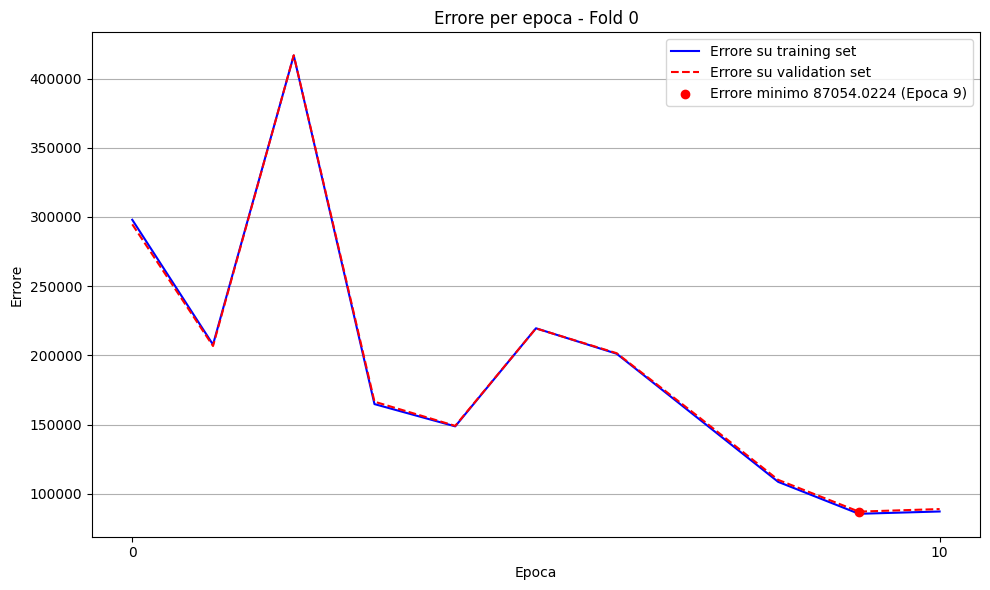

Accuratezza su test set: 0.5691694523013628
Errore nell'iterazione 1: 87359.37288129238
--------------------------------------------------
Fold 2: T | E | V
--------------------------------------------------
Epoch 0/10, Errore su training set: 236766.90994024157, Errore su validation set: 238049.51790706808
Epoch 1/10, Errore su training set: 263787.9343331875, Errore su validation set: 263515.28082220384
Epoch 2/10, Errore su training set: 367885.2271975571, Errore su validation set: 367493.7621495912
Epoch 3/10, Errore su training set: 165814.96273495685, Errore su validation set: 165581.95075767164
Epoch 4/10, Errore su training set: 224682.93781167167, Errore su validation set: 223768.7912711806
Epoch 5/10, Errore su training set: 188711.7779919151, Errore su validation set: 187447.20099325205
Epoch 6/10, Errore su training set: 124957.59711294434, Errore su validation set: 123873.00844406211
Epoch 7/10, Errore su training set: 140366.77819299052, Errore su validation set: 140213.4

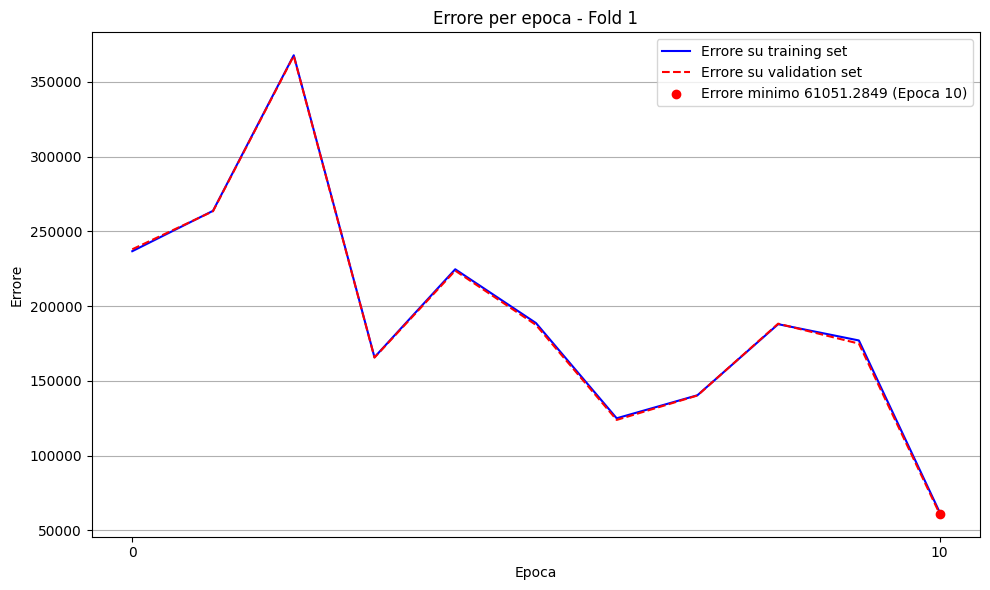

Accuratezza su test set: 0.6953242189174131
Errore nell'iterazione 2: 62497.46094939189
--------------------------------------------------
Fold 3: V | T | E
--------------------------------------------------
Epoch 0/10, Errore su training set: 320236.12834022567, Errore su validation set: 317578.3086896435
Epoch 1/10, Errore su training set: 216280.5470484281, Errore su validation set: 216621.18375701265
Epoch 2/10, Errore su training set: 263093.0365654821, Errore su validation set: 262719.28927580843
Epoch 3/10, Errore su training set: 442054.2010062864, Errore su validation set: 442062.0536956381
Epoch 4/10, Errore su training set: 337088.30751817307, Errore su validation set: 339111.9024136571
Epoch 5/10, Errore su training set: 174725.9916212751, Errore su validation set: 175221.2330915777
Epoch 6/10, Errore su training set: 251589.6565948868, Errore su validation set: 252420.90414306766
Epoch 7/10, Errore su training set: 414761.9566242982, Errore su validation set: 414709.683824

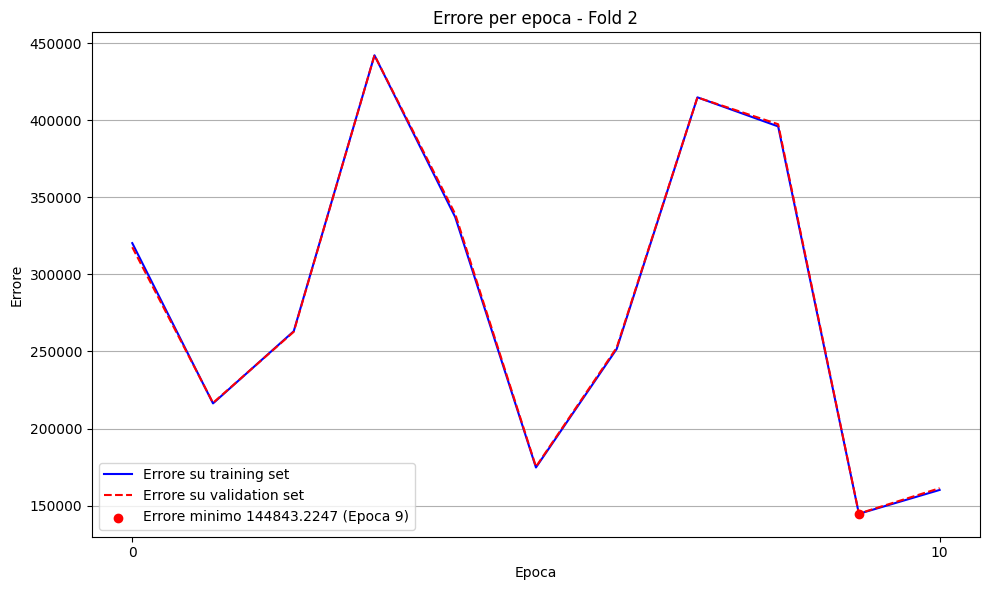

Accuratezza su test set: 0.5029357562250889
Errore nell'iterazione 3: 143272.0197323832
--------------------------------------------------
Elapsed time: 45.49 seconds
Errore medio: 97709.6179, Accuracy media: 0.5891


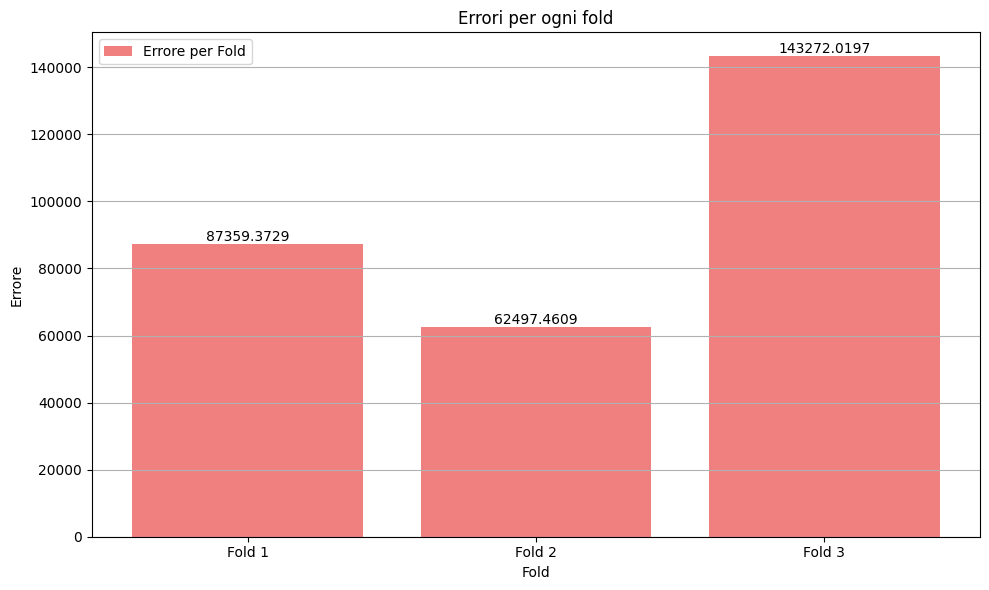

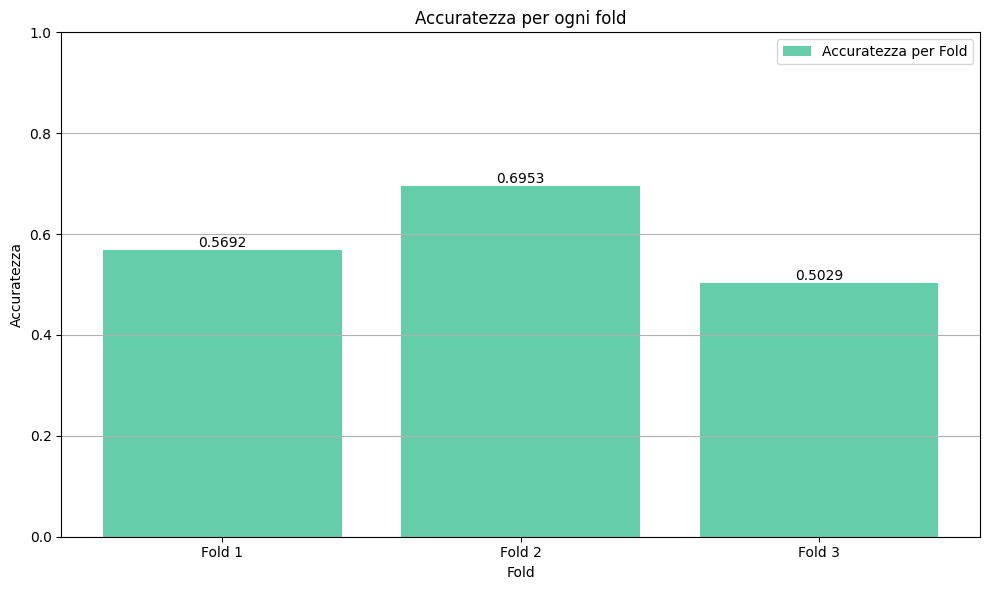


Testing con eta_minus=0.754, eta_plus=1.5813, hidden_neurons=163...
Fold 1: E | V | T
--------------------------------------------------
Epoch 0/10, Errore su training set: 360337.0313410281, Errore su validation set: 359639.44914700417
Epoch 1/10, Errore su training set: 273649.0229365562, Errore su validation set: 273197.3096923253
Epoch 2/10, Errore su training set: 200810.1546012032, Errore su validation set: 201019.05494340745
Epoch 3/10, Errore su training set: 354495.18114538834, Errore su validation set: 355116.66873695015
Epoch 4/10, Errore su training set: 541619.0576059174, Errore su validation set: 542435.6874340241
Epoch 5/10, Errore su training set: 304707.1840611806, Errore su validation set: 305380.75371399854
Epoch 6/10, Errore su training set: 213057.96215260925, Errore su validation set: 214376.3507423238
Epoch 7/10, Errore su training set: 254128.81297220627, Errore su validation set: 254769.523314903
Epoch 8/10, Errore su training set: 410268.83137985744, Errore s

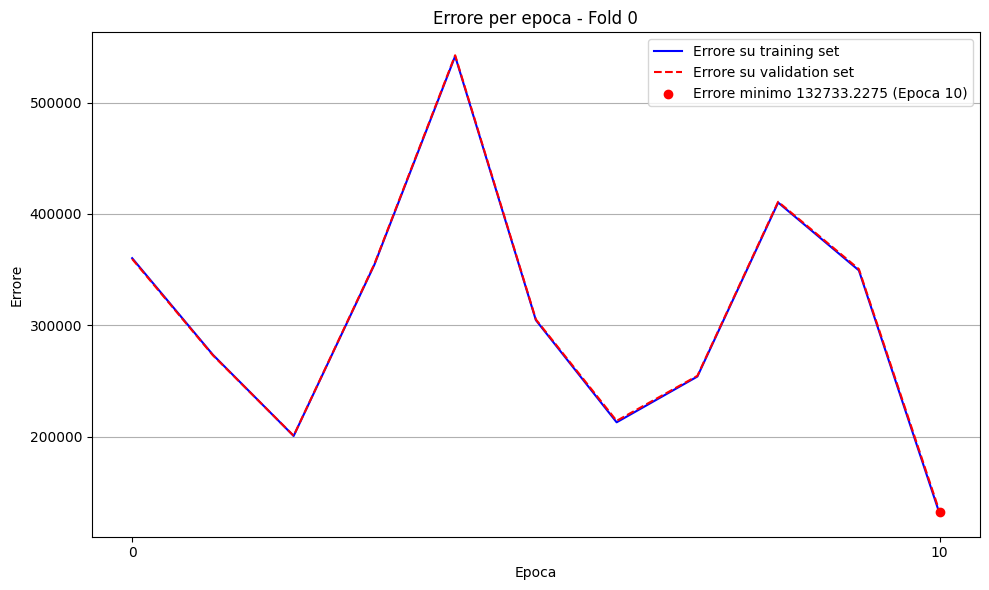

Accuratezza su test set: 0.47780063426759234
Errore nell'iterazione 1: 132769.7026522545
--------------------------------------------------
Fold 2: T | E | V
--------------------------------------------------
Epoch 0/10, Errore su training set: 202051.7018662193, Errore su validation set: 202753.87478846553
Epoch 1/10, Errore su training set: 235280.31022899403, Errore su validation set: 235391.5777660814
Epoch 2/10, Errore su training set: 298385.9470690741, Errore su validation set: 296828.59408028197
Epoch 3/10, Errore su training set: 205289.42819467426, Errore su validation set: 205112.7544522144
Epoch 4/10, Errore su training set: 147728.57190546178, Errore su validation set: 146078.73964677865
Epoch 5/10, Errore su training set: 215162.16050766624, Errore su validation set: 213666.62758934725
Epoch 6/10, Errore su training set: 178542.92917575763, Errore su validation set: 178225.30348716487
Epoch 7/10, Errore su training set: 131010.78227203444, Errore su validation set: 128176

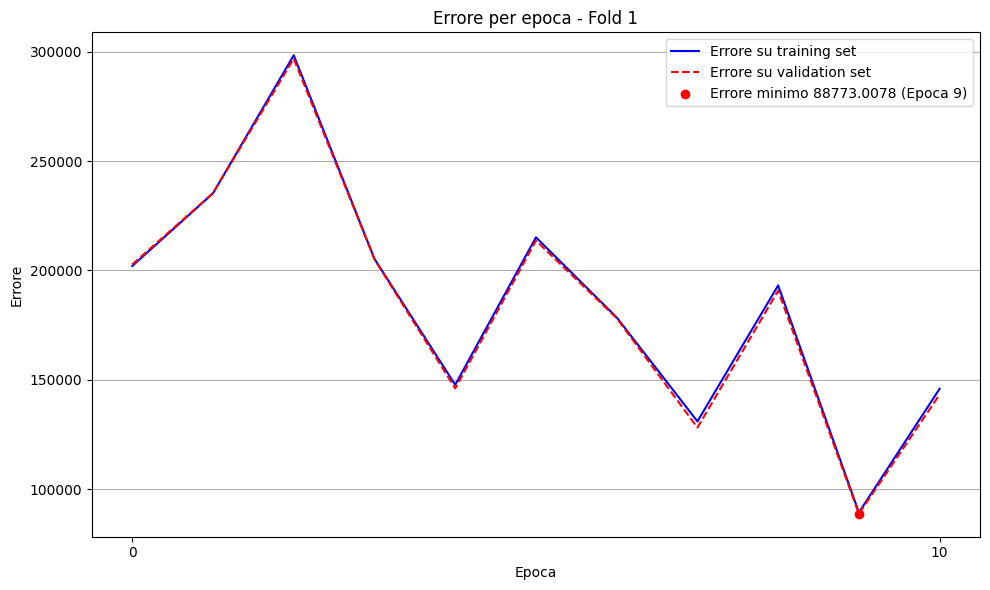

Accuratezza su test set: 0.5695367076672524
Errore nell'iterazione 2: 89512.31355466758
--------------------------------------------------
Fold 3: V | T | E
--------------------------------------------------
Epoch 0/10, Errore su training set: 297284.78087356867, Errore su validation set: 297938.4228104957
Epoch 1/10, Errore su training set: 240469.91027585696, Errore su validation set: 241513.1902426461
Epoch 2/10, Errore su training set: 282003.63450717856, Errore su validation set: 282499.38037618855
Epoch 3/10, Errore su training set: 385942.38585695, Errore su validation set: 386565.2492197031
Epoch 4/10, Errore su training set: 376356.0439506835, Errore su validation set: 375887.536924451
Epoch 5/10, Errore su training set: 180164.8634357088, Errore su validation set: 181095.30945642147
Epoch 6/10, Errore su training set: 255824.87311502473, Errore su validation set: 256961.7223869289
Epoch 7/10, Errore su training set: 166171.4773737957, Errore su validation set: 167515.64743819

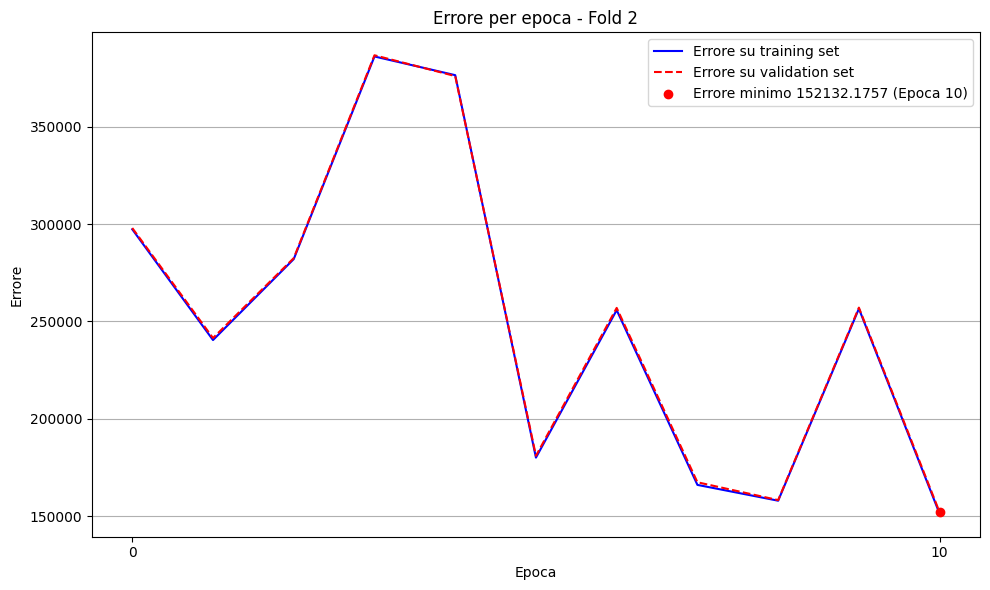

Accuratezza su test set: 0.415677366819526
Errore nell'iterazione 3: 149235.8436041939
--------------------------------------------------
Elapsed time: 30.43 seconds
Errore medio: 123839.2866, Accuracy media: 0.4877


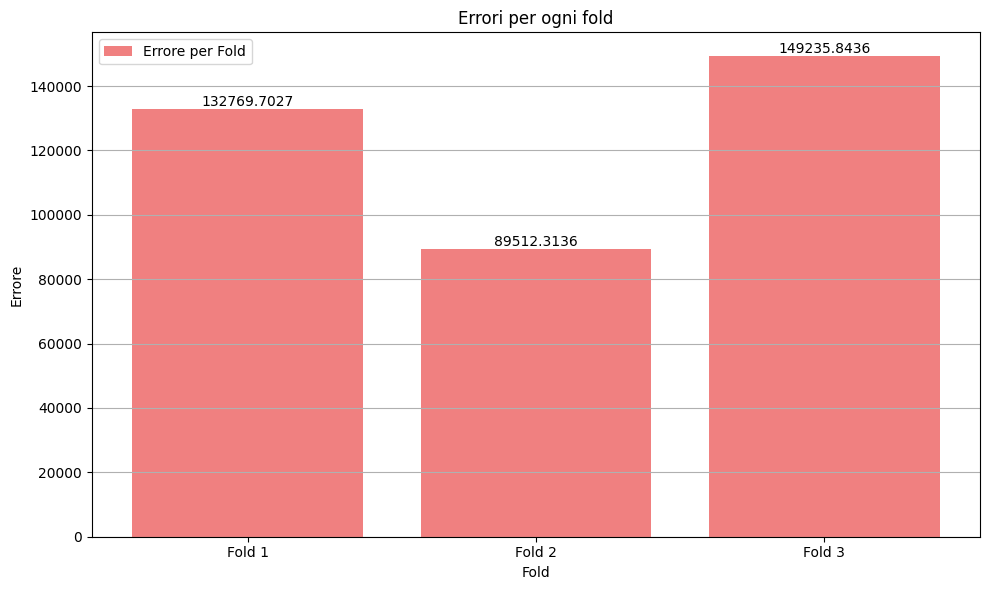

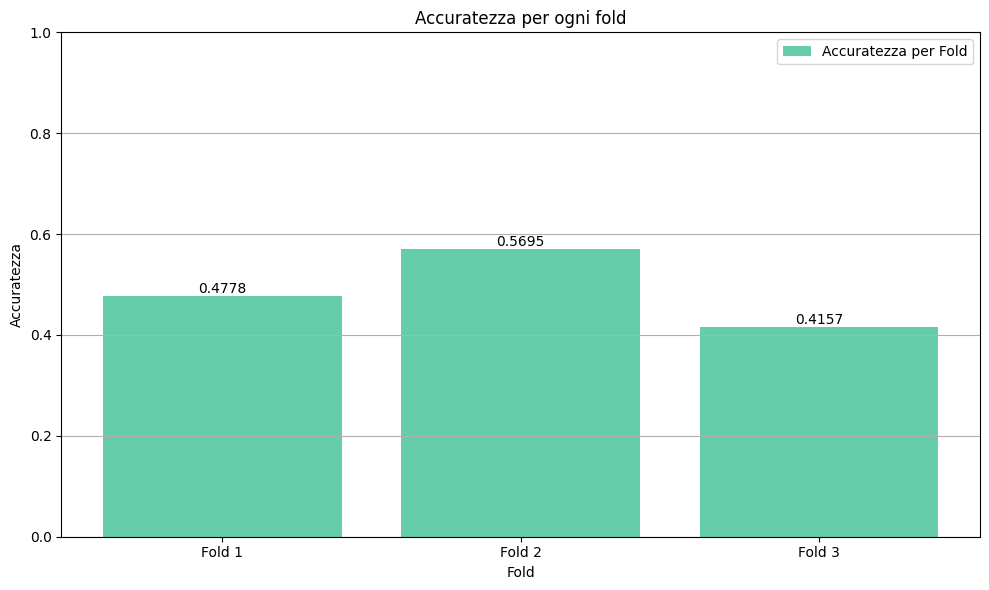


Testing con eta_minus=0.5352, eta_plus=1.3996, hidden_neurons=143...
Fold 1: E | V | T
--------------------------------------------------
Epoch 0/10, Errore su training set: 182107.33761820098, Errore su validation set: 182274.9210033456
Epoch 1/10, Errore su training set: 215395.81179169216, Errore su validation set: 216002.9704928601
Epoch 2/10, Errore su training set: 202894.3278713687, Errore su validation set: 203595.29947392285
Epoch 3/10, Errore su training set: 156757.56881628025, Errore su validation set: 157781.1964580515
Epoch 4/10, Errore su training set: 122232.44492848296, Errore su validation set: 122732.00245975358
Epoch 5/10, Errore su training set: 88234.99396585683, Errore su validation set: 89660.73454270948
Epoch 6/10, Errore su training set: 76600.60740546431, Errore su validation set: 77757.5883763344
Epoch 7/10, Errore su training set: 65831.75839481721, Errore su validation set: 66075.37823331768
Epoch 8/10, Errore su training set: 34256.386891763905, Errore s

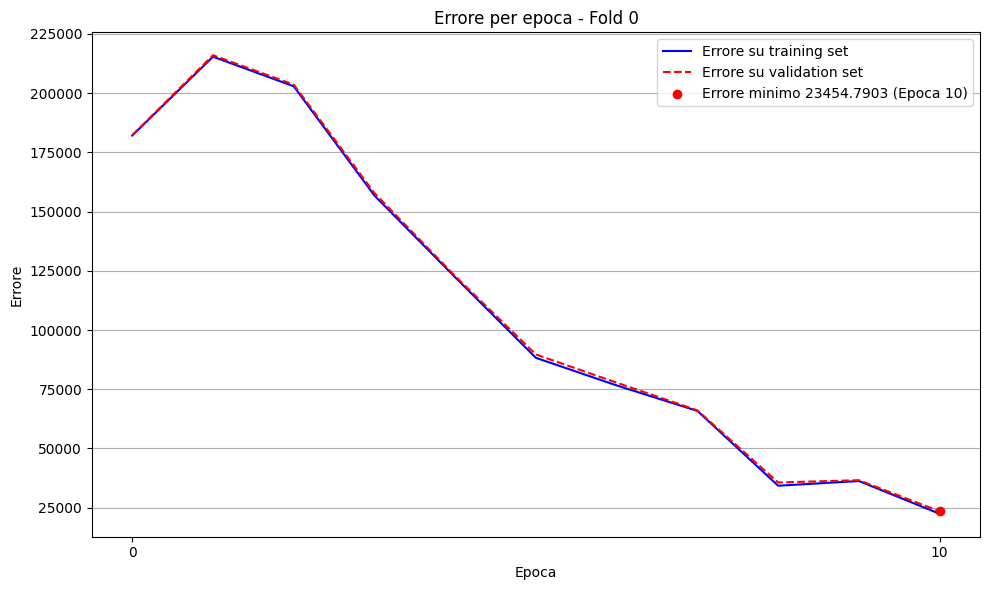

Accuratezza su test set: 0.759835433273335
Errore nell'iterazione 1: 24323.560996395943
--------------------------------------------------
Fold 2: T | E | V
--------------------------------------------------
Epoch 0/10, Errore su training set: 361826.1836557933, Errore su validation set: 361751.06070111995
Epoch 1/10, Errore su training set: 304244.7158304794, Errore su validation set: 305184.9849719805
Epoch 2/10, Errore su training set: 260934.81133271795, Errore su validation set: 260756.55315604265
Epoch 3/10, Errore su training set: 371843.3440874551, Errore su validation set: 371304.64215637895
Epoch 4/10, Errore su training set: 147844.78454213095, Errore su validation set: 147909.59906661237
Epoch 5/10, Errore su training set: 96704.30318508399, Errore su validation set: 96063.10254331071
Epoch 6/10, Errore su training set: 184365.0923204114, Errore su validation set: 184286.04923055947
Epoch 7/10, Errore su training set: 63519.63318953148, Errore su validation set: 63678.41411

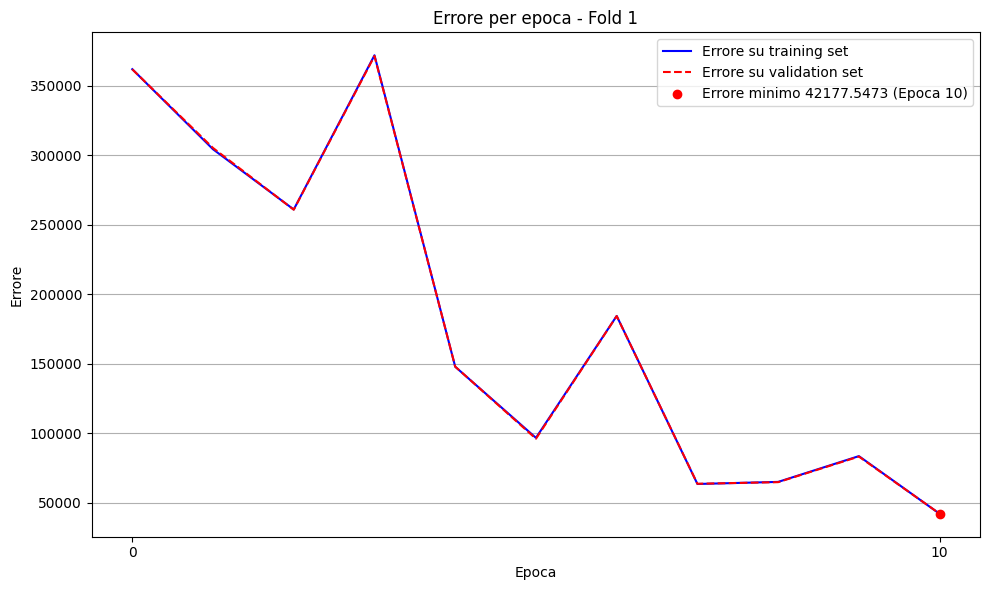

Accuratezza su test set: 0.6181374019628851
Errore nell'iterazione 2: 42321.542216112895
--------------------------------------------------
Fold 3: V | T | E
--------------------------------------------------
Epoch 0/10, Errore su training set: 264801.53446052154, Errore su validation set: 264307.94689566246
Epoch 1/10, Errore su training set: 190755.60216737635, Errore su validation set: 191681.20597080223


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import csv
import time
from PIL import Image
from sklearn.datasets import fetch_openml
import pandas as pd
import random
import sklearn.model_selection as sk
import scipy.special as sc
import numpy as np
import random


def main():
    # Caricamento del dataset MNIST ridimensionato a 14x14 pixel
    X, y = load_mnist_784(width_size=14, height_size=14)

    # Dimensione dell'input (numero di feature per esempio)
    input_size = X.shape[1]
    # Numero di neuroni nel livello nascosto
    hidden_size = 128
    # Numero di classi (cifre da 0 a 9)
    output_size = 10
    # Tasso di apprendimento
    learning_rate = 0.0001
    # Numero di epoche per fold
    epochs = 300
    # Numero di esempi dopo i quali avviene un aggiornamento della rete neurale
    batch_size = X.shape[0]
    # Numero di fold per la validazione incrociata
    k = 10

    # Definizione dei valori degli iperparametri da testare nella grid search
    hyperparameters = {
        "h_eta_minusses": [0.5, 0.6, 0.7],
        "h_eta_plusses": [1.2, 1.3, 1.5],
        "h_neurons": [64, 128, 256]
    }

    # Definizione degli intervalli di ricerca per la random search (h_neurons è un intervallo di valori discreti)
    hyperparameters_ranges = {
        "h_eta_minusses": [0.4, 0.9],
        "h_eta_plusses": [1.1, 1.6],
        "h_neurons": [64, 256]
    }

    # Esecuzione della grid search per la ricerca degli iperparametri
    all_errors, all_accuracies, param_labels = grid_search(
        X, y, k, epochs, batch_size, input_size, output_size, learning_rate, hyperparameters)

    # Esecuzione della random search per la ricerca degli iperparametri
    fold_errors, fold_accuracies, param_labels = random_search(
        X, y, k, epochs, batch_size, input_size, output_size, learning_rate, hyperparameters_ranges, n_iter=10)

if __name__ == "__main__":
    main()


Cross Entropy senza softmax non funzionante??
Cross-entropy sensata senza l'utilizzo di softmax o comunque di una distribuzione di probabilità??
Cross entropy derivata? (se va bene il clipping)
Si possono usare le funzioni di librerie, oppure le funzioni andrebbero scritte da zero? (es. gestione del dataset)
Vanno bene le nostre scelte implementative (con spiegazione) oppure manca/va rifatto qualcosa che ci è sfuggito?
Rprop funziona duplicando delta_weights_matrix?
Come implementare la K-Fold?? (con o senza validation per ogni Fold)
Documentazione, una macroscaletta dei capitoli, quanto essere esaustivi, su cosa concentrarci??
Date consegne ??
AGGIUNGERE SHUFFLING PER MINIBATCH O ONLINE?

Epoch 1/10, Test Accuracy: 0.8896428571428572
Epoch 2/10, Test Accuracy: 0.9107857142857143
Epoch 3/10, Test Accuracy: 0.9196428571428571
Epoch 4/10, Test Accuracy: 0.9255714285714286
Epoch 5/10, Test Accuracy: 0.9305714285714286
Epoch 6/10, Test Accuracy: 0.9322857142857143
Epoch 7/10, Test Accuracy: 0.9348571428571428
Epoch 8/10, Test Accuracy: 0.9372857142857143
Epoch 9/10, Test Accuracy: 0.9398571428571428
Epoch 10/10, Test Accuracy: 0.9419285714285714